# Movie Dataset Data Wrangling

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 899.6 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=e47c7daacf011a66c04016ae04a70ce76464628ef7c8cfbe835a7ad2dbd16a2e
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.1 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 30.5 MB/s eta 0:00:00


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
This project aims to analyze and understand the main causes that influence movie success and popularity by wrangling and combining two rich movie datasets. Using the Kaggle movies dataset and the official IMDb title basics data, I will explore relationships between movie metadata such as genres, release year, runtime, and user ratings. By cleaning and integrating these datasets, I aim to answer questions about how certain movie attributes impact their ratings and commercial success.

**Research Question**
- How do movie genres influence average viewer ratings and revenue?


### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**

Type: *CSV file (movies_metadata.csv) from Kaggle dataset The Movies Dataset*

Method: *The dataset was gathered programmatically using the Kaggle API. We used the Kaggle command line tool to download and unzip the dataset into our working environment.* 
 
Dataset variables: (selected)
*   *`imdb_id`: Unique IMDb identifier for each movie* 
*   *`title`: Movie title*
*   *`genres`: List of genres associated with the movie*
*   *`release_date`: Movie release date*
*   *`budget`: Movie production budget*
*   *`revenue`: Movie revenue*
*   *`vote_average`: Average user rating*
*   *`vote_count`: Number of user ratings*

In [3]:
!~/.local/bin/kaggle datasets download -d rounakbanik/the-movies-dataset -p ./movies --unzip

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 96%|███████████████████████████████████████▍ | 219M/228M [00:00<00:00, 214MB/s]
100%|█████████████████████████████████████████| 228M/228M [00:00<00:00, 245MB/s]


In [4]:
import pandas as pd

df = pd.read_csv("./movies/movies_metadata.csv")

/tmp/ipykernel_13/736194301.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./movies/movies_metadata.csv")


In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.shape

(45466, 24)

#### Dataset 2

Type: TSV file (`title.basics.tsv.gz`) from IMDb

Method: The dataset was gathered programmatically using Python’s requests library from the IMDb official dataset repository. The file was downloaded and loaded into a pandas DataFrame.

This dataset was used because it complete the Kaggle movies dataset by providing basic metadata about movies, including IMDb IDs, which allow linking the two datasets. This gives us a richer set of attributes (like `titleType`, `startYear`, and `genres`) to explore movie success factors.

Dataset variables:

*   *`tconst`: Unique identifier for each title (corresponds to imdb_id in Dataset 1)*
*   *`primaryTitle`: The movie’s main title*
*   *`startYear`: Release year of the title*
*   *`runtimeMinutes`: Duration of the movie*
*   *`genres`: Genres associated with the movie*

In [7]:
import requests

url = "https://datasets.imdbws.com/title.basics.tsv.gz"
filename = "title.basics.tsv.gz"

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

In [8]:
df_title_basics = pd.read_csv("title.basics.tsv.gz", sep='\t', dtype=str, na_values='\\N')
df_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,NaN,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,Short


In [9]:
df_title_basics.shape

(11812577, 9)

In [10]:
#store the raw data in your local data store
df.to_csv("raw_movies_metadata.csv", index=False)
df_title_basics.to_csv("raw_imdb_basics.csv", index=False)

## 2. Assess data

In [11]:
df.info()
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

df (movies_metadata) has 24 columns, many of which are stored as object type, including several that should be numeric like `budget` and `popularity`.

df_title_basics has 9 columns, all stored as object type, even for variables like `runtimeMinutes` and `startYear`, which should be numeric.

In the **cleaning** phase, we will convert columns to their correct data types and fix any inconsistent or invalid values. Specifically:

In df (movies_metadata):
- `budget` → convert to float
- `revenue` → already float64, but we will treat 0 values as missing
- `popularity` → convert to float
- `release_date` → convert to datetime
- `vote_count` → convert to int

In df_title_basics:
- `startYear` → convert to int
- `endYear` → convert to int, accounting for missing values
- `runtimeMinutes` → convert to int, handling non-numeric entries
- `isAdult` → convert to int or bool
---

In [12]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


- `revenue`, `budget`, and `vote_count` all have min = 0, which is not realistic.
- Many rows have 0 `revenue` or `budget`, which may mean missing values, not actual zeros.

In [13]:
df_title_basics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,11812577,11812577,11812557,11812557,11812576,10373797,144710,3938912,11289695
unique,11812577,11,5322503,5348326,36,152,100,987,2371
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,2021,2019,30,Drama
freq,1,9091857,55885,55885,11427705,515630,7513,395791,1328099


- `runtimeMinutes` top value is "30" (a string). This column has invalid string types.
- High cardinality in many fields (primaryTitle, genres, etc.)
---

In [14]:
df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

- `belongs_to_collection`, `homepage` and `tagline` have a lot of missing values.
- `imdb_id` has 17 missing values which important for merging with the df_title_basics.
- `release_date`, `status`, `runtime` have small number of missing values.

In [15]:
df_title_basics.isnull().sum().sort_values(ascending=False)

endYear           11667867
runtimeMinutes     7873665
startYear          1438780
genres              522882
primaryTitle            20
originalTitle           20
isAdult                  1
tconst                   0
titleType                0
dtype: int64

- `endYear` is missing more than 11 million rows, This is a major completeness issue, which could affect the analysis that could involving a movie’s end year or duration.
- `runtimeMinutes` is missing nearly 8 million rows, this also limits our ability to analyze the relationship between runtime and other factors like popularity or genre.
- `startYear` is missing nearly 1.4 million rows. this is also limits our ability to analysis because release year is often used for time based trends and grouping.
- `genres` is missing in nearly 500K rows, while it is a key categorical variable for classification and comparison, so this affects the completeness and usefulness of the data.
---

In [16]:
df.duplicated().sum()

13

The df (movies_metadata) dataset contains 13 duplicate rows, which is a uniqueness issue. 

In [17]:
df_title_basics.duplicated().sum()

0

No duplicated rows in the df_title_basics.

---

Now we'll search for low-variance or constant columns and potential ID fields.

In [18]:
df.nunique().sort_values()

video                        2
adult                        5
status                       6
vote_average                92
original_language           92
runtime                    353
budget                    1226
belongs_to_collection     1698
vote_count                1820
spoken_languages          1931
production_countries      2393
genres                    4069
revenue                   6863
homepage                  7673
release_date             17336
tagline                  20283
production_companies     22708
title                    42277
original_title           43373
popularity               44176
overview                 44307
poster_path              45024
imdb_id                  45417
id                       45436
dtype: int64

- `video`, `adult`, `status` have very few unique values consider converting to categorical or dropping.
- `title` and `original_title` have many unique values.
- `genres` has 4,000+ unique strings, likely messy structure (stringified lists).
---

In [19]:
df_title_basics.nunique().sort_values()

titleType               11
isAdult                 36
endYear                100
startYear              152
runtimeMinutes         987
genres                2371
primaryTitle       5322503
originalTitle      5348326
tconst            11812577
dtype: int64

- `titleType`, `isAdult`, `endYear`, `startYear`, and `genres` columns have relatively low cardinality, suggesting they are categorical variables suitable for grouping or filtering.
- `primaryTitle` and `originalTitle` each have over 5 million unique values, and `tconst` has over 11 million unique identifiers, which reflects very high cardinality. While this is expected (since titles and IDs should be unique), high-cardinality fields can complicate plotting, memory usage, and some types of grouping or aggregation.

### Quality Issue 1: Missing/Incomplete Values

In [20]:
#Inspecting the dataframe visually
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [21]:
#Inspecting the dataframe programmatically
df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

**Issue and justification:**
The movies_metadata dataset has significant missing values in important columns:
- `release_date` is missing in 87 rows
- `runtime` is missing in 263 rows
- `overview` and `tagline` are missing in 954 and 25,054 rows respectively

These fields are critical for temporal and content based analysis, missing values in `release_date` affect the ability to analyze movie trends over time, while missing `runtime` limits any duration based insights, while `overview` and `tagline` affect textual and genre based modeling. This impacts the completeness and accuracy of the dataset.

In [22]:
#Inspecting the dataframe visually
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11812577 entries, 0 to 11812576
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 811.1+ MB


In [23]:
#Inspecting the dataframe programmatically
df_title_basics.isnull().sum().sort_values(ascending=False)

endYear           11667867
runtimeMinutes     7873665
startYear          1438780
genres              522882
primaryTitle            20
originalTitle           20
isAdult                  1
tconst                   0
titleType                0
dtype: int64

**Issue and justification:** 
The df_title_basics dataset has extensive missing values in critical fields:
- `endYear`: missing in 11M+ rows
- `runtimeMinutes`: missing in 8M+ rows
- `startYear`: missing in 1.4M+ rows

These columns are essential for analyzing movie trends and durations, missing data in these columns affects completeness and validity.

### Quality Issue 2:  Invalid/Inconsistent Data Types

In [24]:
#Inspecting the dataframe visually
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [25]:
#Inspecting the dataframe programmatically
print('budget:',df['budget'].unique()[:10])
print('popularity:',df['popularity'].unique()[:10])
print('release_date:',df['release_date'].unique()[:10])

budget: ['30000000' '65000000' '0' '16000000' '60000000' '58000000' '35000000'
 '62000000' '44000000' '98000000']
popularity: [21.946943 17.015539 11.7129 3.859495 8.387519 17.924927 6.677277 2.561161
 5.23158 14.686036]
release_date: ['1995-10-30' '1995-12-15' '1995-12-22' '1995-02-10' '1995-11-16'
 '1995-11-17' '1995-11-22' '1995-12-13' '1995-12-09' '1995-11-10']


**Issue and justification:**
columns like `budget`, `popularity`, and `release_date` are stored as strings, even though they represent numeric or datetime values. This violates validity and accuracy, and these fields must be converted to appropriate data types (float or datetime) for meaningful aggregation and analysis.

In [26]:
#Inspecting the dataframe visually
df_title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [27]:
#Inspecting the dataframe programmatically
print('runtimeMinutes:', df_title_basics['runtimeMinutes'].unique()[:10])
print('startYear:', df_title_basics['startYear'].unique()[:10])
print('endYear:', df_title_basics['endYear'].unique()[:10])

runtimeMinutes: ['1' '5' '12' '45' '2' nan '3' '100' '13' '6']
startYear: ['1894' '1892' '1893' '1895' '1896' '1898' '1897' '1900' '1899' '1901']
endYear: [nan '1947' '1945' '1955' '1949' '1958' '1951' '1950' '1952' '1954']


**Issue and justification:**
`runtimeMinutes`, `startYear`, and `endYear` columns are stored as strings instead of numeric types. This includes values like 'nan', or other non-numeric entries. These should be numeric for accurate analysis of movie durations and release trends. This violates validity and consistency, and requires conversion and cleaning.

### Tidiness Issue 1: One Observation Spread Across Two Tables

In [28]:
#Inspecting the dataframe visually
df[['imdb_id', 'title']].head()

,imdb_id,title
0,tt0114709,Toy Story
1,tt0113497,Jumanji
2,tt0113228,Grumpier Old Men
3,tt0114885,Waiting to Exhale
4,tt0113041,Father of the Bride Part II


In [29]:
#Inspecting the dataframe visually
df_title_basics[['tconst', 'primaryTitle']].head()

,tconst,primaryTitle
0,tt0000001,Carmencita
1,tt0000002,Le clown et ses chiens
2,tt0000003,Poor Pierrot
3,tt0000004,Un bon bock
4,tt0000005,Blacksmith Scene


In [30]:
#Inspecting the dataframe programmatically
df['imdb_id'].nunique(), df_title_basics['tconst'].nunique()

(45417, 11812577)

**Issue and justification:** 
Information about the same movies is spread across two separate tables (df and df_title_basics). To perform right movie level analysis, we need to merge them using `imdb_id` from df and `tconst` from df_title_basics. This violates the rule of tidy data that says each type of observational unit forms a table. Merging the datasets will union the variables into a single table where each row represents one movie.

### Tidiness Issue 2: Multiple Values in One Column (genres)

In [31]:
#Inspecting the dataframe visually
df['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [32]:
#Inspecting the dataframe visually
df_title_basics['genres'].head()

0           Documentary,Short
1             Animation,Short
2    Animation,Comedy,Romance
3             Animation,Short
4                       Short
Name: genres, dtype: object

In [33]:
#Inspecting the dataframe programmatically
df['genres'].iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [34]:
#Inspecting the dataframe programmatically
df_title_basics['genres'].iloc[0]

'Documentary,Short'

**Issue and justification:** 
In both datasets the `genres` column violates the tidy data principle that each variable should have its own column. In df, genres are stored as a list of dictionaries in a single string, while in df_title_basics, multiple genres are combined into one comma separated string. This makes it difficult to analyze or filter by individual genre types. To tidy this, the genres field should be transformed so that each genre occupies its own row or a normalized structure is used (exploding into multiple rows or using binary columns for each genre).

---
### Assessment Summary

After a thorough inspection of both datasets (`df` from *The Movies Dataset* and `df_title_basics` from IMDb), the following key issues and observations were made regarding **data quality**, **tidiness**, and **structure**:

---

#### **Quality Issues**

- **Missing Values**:
  - `df_title_basics` contains major missing values:
    - `endYear`: 11 million missing
    - `runtimeMinutes`: 8 million missing
    - `startYear`: 1.4 million missing
    - `genres`: 500K missing
  - `df` also has missing values in:
    - `release_date`, `runtime`, `status`, and `imdb_id` (17 missing, critical for merging).
    - `belongs_to_collection`, `homepage`, and `tagline` have significant nulls but may be less critical.

- **Invalid or Inaccurate Values**:
  - `revenue`, `budget`, and `vote_count` have a minimum value of `0`, which is often unrealistic and may indicate missing data recorded as zero.
  - `runtimeMinutes` includes invalid string values ( `"nan"`), which are not valid for analysis.

- **Incorrect Data Types**:
  - In `df`, numeric-like fields are stored as objects:
    - `budget`, `popularity`, `vote_count` → should be converted to `float` or `int`
    - `release_date` → should be converted to `datetime`
  - In `df_title_basics`, all columns are objects, including:
    - `startYear`, `endYear`, `runtimeMinutes`, and `isAdult`, which should be numeric or boolean

- **Duplicates**:
  - `df` contains **13 duplicate rows**, which should be removed.
  - `df_title_basics` has no duplicates.

---

#### **Tidiness Issues**

- **Split Observations Across Tables**:
  - The same movie’s information is split between `df` and `df_title_basics` (linked by `imdb_id`/`tconst`), requiring a merge. This violates the tidy data rule thet each type of observational unit forms a table*.

- **Multiple Values in One Column**:
  - The `genres` column in both datasets contains **multiple values in a single cell**:
    - `df`: stringified JSON objects (for example `[{'id': 35, 'name': 'Comedy'}]`)
    - `df_title_basics`: comma-separated strings (for example `'Drama,Romance'`)
  - These should be unpacked into separate rows or normalized to allow proper filtering/grouping.

---

#### **Additional Notes**

- **Cardinality Considerations**:
  - High cardinality fields:
    - `primaryTitle`, `originalTitle`, and `tconst` (millions of unique values)
  - Low cardinality fields (candidates for categorical):
    - `titleType`, `isAdult`, `status`, `video`, `adult`, `genres` (after we do cleaning)

- **Data Cleaning Actions Planned**:
  In the cleaning phase, the following conversions and fixes will be applied:
  - `df`:
    - `budget`, `popularity`, `vote_count` → convert to numeric
    - `release_date` → convert to datetime
    - `revenue` → treat `0` as missing
  - `df_title_basics`:
    - `startYear`, `endYear`, `runtimeMinutes` → convert to numeric
    - `isAdult` → convert to boolean/integer

---

These issues will be addressed in the data cleaning phase to ensure right analysis.

## 3. Clean data

In [73]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
df_clean = df.copy()
df_title_clean = df_title_basics.copy()

### **Quality Issue 1: Missing / Incomplete Values**

As we can't drop rows blindly so instead, we'll:
- drop rows where critical fields are missing (like imdb_id, release_date, or runtime)
- Leave some high null fields as they are like homepage, tagline since they’re not essential for this analysis
- we could impute or mark missing values in fields like runtimeMinutes for modeling later

In [74]:
# the cleaning strategy
# for df_clean
# drop rows with missing (imdb_id is important for merging)
df_clean = df_clean.dropna(subset=['imdb_id', 'release_date', 'runtime', 'status'])

# drop less useful columns with too much missingness
df_clean = df_clean.drop(columns=['homepage', 'tagline', 'belongs_to_collection'])

In [75]:
# Validate the cleaning was successful
# df_clean
df_clean[['imdb_id', 'release_date', 'runtime', 'status']].isna().sum()

imdb_id         0
release_date    0
runtime         0
status          0
dtype: int64

In [76]:
# the cleaning strategy
# for df_title_clean
df_title_clean = df_title_clean.dropna(subset=['startYear'])

## these under are imputing the nulls 
# we will do them later on after we fis the datatypes
# # Fill endYear with startYear for entries likely to be movies (not series)
# df_title_clean['endYear'] = df_title_clean['endYear'].fillna(df_title_clean['startYear'])

# # since the runtimeMinutes nulls are nearly 8M dropping them will fix the analysis 
# # so we will impute with median
# median_runtime = df_title_clean['runtimeMinutes'].median()
# df_title_clean['runtimeMinutes'] = df_title_clean['runtimeMinutes'].fillna(median_runtime)

# # for now we will fil the missing genres with 'Unknown'
# df_title_clean['genres'] = df_title_clean['genres'].fillna('Unknown')

In [77]:
# Validate the cleaning was successful
# df_title_clean
df_title_clean[['startYear', 'endYear', 'runtimeMinutes', 'genres']].isna().sum()

startYear                0
endYear           10229089
runtimeMinutes     6676313
genres              436337
dtype: int64

**Justification:**
We addressed missing values based on the importance of each field to our analysis, in `df_clean`, we dropped rows with missing values in critical fields like `imdb_id`, `release_date`, `runtime`, and `status`, since these are essential for merging datasets and performing reliable analysis, but columns like `homepage`, `tagline`, and `belongs_to_collection` were dropped because of excessive missingness and limited analytical value.

In `df_title_clean`, we removed rows missing the `startYear`, as this column is important for temporal analysis and modeling, but instead of dropping rows with missing `endYear`, `runtimeMinutes`, or `genres`, we plan to handle those later using appropriate imputation techniques (like median for `runtimeMinutes`, fallback logic for `endYear`, and category 'Unknown' for `genres`). This prevents data loss while maintaining dataset integrity for future modeling and exploration.

---

### **Quality Issue 2: Incorrect data types in df**

In [78]:
# the cleaning strategy
# for df_clean
# Convert release_date to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')

# Convert budget, popularity, vote_count to numeric
df_clean['budget'] = pd.to_numeric(df_clean['budget'], errors='coerce')
df_clean['popularity'] = pd.to_numeric(df_clean['popularity'], errors='coerce')
df_clean['vote_count'] = pd.to_numeric(df_clean['vote_count'], errors='coerce')

In [79]:
# Validate the cleaning was successful
# df_clean dtypes check
df_clean[['release_date', 'budget', 'popularity', 'vote_count']].dtypes

release_date    datetime64[ns]
budget                   int64
popularity             float64
vote_count             float64
dtype: object

In [80]:
# the cleaning strategy
# for df_title_clean
# Convert startYear, endYear, runtimeMinutes to numeric
df_title_clean['startYear'] = pd.to_numeric(df_title_clean['startYear'], errors='coerce')
df_title_clean['endYear'] = pd.to_numeric(df_title_clean['endYear'], errors='coerce')
df_title_clean['runtimeMinutes'] = pd.to_numeric(df_title_clean['runtimeMinutes'], errors='coerce')

# Convert isAdult to boolean (0 or 1)
df_title_clean['isAdult'] = df_title_clean['isAdult'].astype('bool')

In [81]:
# Validate the cleaning was successful
# df_title_clean dtypes check
df_title_clean[['startYear', 'endYear', 'runtimeMinutes', 'isAdult']].dtypes

startYear           int64
endYear           float64
runtimeMinutes    float64
isAdult              bool
dtype: object

**Justification:** 
correcting data types ensures numerical operations, date comparisons, and logical filtering work as expected. So storing them the right way as numeric fields (like budget, vote_count, and runtimeMinutes) as numbers allows us to calculate aggregates, apply models, and generate accurate statistics. Converting release_date to datetime allows time based analysis (for example trends over years), same as converting isAdult to boolean simplifies filtering and better reflects its binary nature.

### **Quality Issue 3: Missing values in `runtimeMinutes`, `endYear`, `genres`**

In [82]:
# apply the cleaning strategy
# impute the nulls
# Fill endYear with startYear for entries likely to be movies (not series)
df_title_clean['endYear'] = df_title_clean['endYear'].fillna(df_title_clean['startYear'])

# since the runtimeMinutes nulls are nearly 8M dropping them will fix the analysis 
# so we will impute with median
median_runtime = df_title_clean['runtimeMinutes'].median()
df_title_clean['runtimeMinutes'] = df_title_clean['runtimeMinutes'].fillna(median_runtime)

# for now we will fil the missing genres with 'Unknown'
df_title_clean['genres'] = df_title_clean['genres'].fillna('Unknown')

In [83]:
# Validate the cleaning was successful
# df_title_clean
df_title_clean[['endYear', 'runtimeMinutes', 'genres']].isna().sum()

endYear           0
runtimeMinutes    0
genres            0
dtype: int64

**Justification:**
Imputing missing values in `endYear`, `runtimeMinutes`, and `genres` is necessary as we can't drop the nulls rows as they too much so we need to maintain data completeness and improve the quality of analysis. Filling endYear with startYear for likely movies ensures logical consistency where no separate end year exists, but we could be corrected from someone work in the field of movie production or trying to collect more data. Using the median to impute runtimeMinutes is appropriate because it reduces the impact of extreme values and preserves the central tendency of the data, especially given the large number of missing values that would otherwise result in significant data loss if dropped. Filling missing genres with 'Unknown' avoids losing records due to incomplete categorical data while maintaining a clear marker for unknown entries, enabling downstream modeling or analysis to handle these cases explicitly.

### Quality Issue 4: Invalid values - budget/revenue/vote_count are 0 but should be NaN

0 for financial or popularity fields usually indicates missing or invalid data, not a real "zero".

now i will create flags for tracking imputed/missing values so later i would now how to deal with them

In [84]:
# apply the cleaning strategy
# replace 0 with NaN for better analysis
import numpy as np
cols = ['budget', 'revenue', 'vote_count']
df_clean[cols] = df_clean[cols].replace(0, np.nan)

In [85]:
df_clean['missing_budget'] = df_clean['budget'].isna()
df_clean['missing_revenue'] = df_clean['revenue'].isna()
df_clean['missing_vote_count'] = df_clean['vote_count'].isna()

In [86]:
# Validate the cleaning was successful
df_clean[cols].isna().sum()

budget        36158
revenue       37631
vote_count     2730
dtype: int64

**Justification:**
Replacing zero values in `budget, revenue, and vote_count with NaN improves data quality by correctly identifying these zeros as missing or unreported information rather than valid entries. It is unrealistic for released movies to have zero revenue or votes, and zero budget is typically a placeholder for unknown or missing data. This cleaning step ensures that statistical analyses or modeling do not get biased by misleading zero values, allowing for better handling of missing data through imputation or exclusion, which ultimately leads to more accurate and reliable insights.

Now we will impute budget using median by genre

In [87]:
# calc median budget per genre
median_budget_by_genre = df_clean.groupby('genres')['budget'].median()

# imputation function
def impute_budget(row):
    if pd.isna(row['budget']):
        return median_budget_by_genre.get(row['genres'], df_clean['budget'].median())
    return row['budget']

# apply it
df_clean['budget'] = df_clean.apply(impute_budget, axis=1)

I do the imputation using median by genre, because i think genre can strongly influence budget for example Sci-Fi typically gets more funding than Documentary, so this is context aware imputation.

Now we will investigate the `vote_count`

In [88]:
df_clean[df_clean['vote_count'].isna()].sort_values('popularity', ascending=False).head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,title,video,vote_average,vote_count,missing_budget,missing_revenue,missing_vote_count
26565,False,77500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,tt3501632,en,Thor: Ragnarok,Thor is imprisoned on the other side of the un...,57.283628,/avy7IR8UMlIIyE2BPCI4plW4Csc.jpg,...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,Thor: Ragnarok,False,0.0,NaN,True,True,True
26561,False,77500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,tt0974015,en,Justice League,Fueled by his restored faith in humanity and i...,25.944629,/9rtrRGeRnL0JKtu9IMBWsmlmmZz.jpg,...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,Justice League,False,0.0,NaN,True,True,True
24545,False,3500000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",264646,tt2234550,en,LEGO Hero Factory: Savage Planet,The Hero Factory's mission: to build the brave...,3.120999,/x0dgTt0NuIfZmxEI2EbrbIkhFhY.jpg,...,45.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,LEGO Hero Factory: Savage Planet,False,0.0,NaN,True,True,True
25494,False,825000.0,[],255496,tt2317090,en,And Then There Was You,Natalie resorts to picking up the pieces of he...,2.686014,/pp3jIs6ZLCKf1DiEMhGy3arH6uh.jpg,...,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,And Then There Was You,False,0.0,NaN,True,True,True
45290,False,4350000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",383618,tt4861720,sv,Siv sover vilse,Seven-year-old Siv’s first night sleeping over...,2.660047,/lBNZ5wXHkX8Lg08kdNuo1E2H4q6.jpg,...,79.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,Siv Sleeps Astray,False,0.0,NaN,True,True,True


We saw that popular movies such as Thor: Ragnarok have missing (NaN) values for vote_count. This supports the assumption that vote_count = 0 was not a real value but instead represented missing data. Replacing it with NaN allows us to treat it appropriately during analysis.

Now for `revenue` imputing could lead to fabricated or misleading data. Better to leave missing and account for it during analysis.

The `has_financials` column is a binary indicator that tells us whether both budget and revenue are present. This is useful for analyses that require complete financial data, such as computing return on investment (ROI), profitability, or economic comparisons across films.

In [89]:
df_clean['has_financials'] = df_clean[['budget', 'revenue']].notna().all(axis=1)

### Quality Issue 5: Duplicate rows in df

In [90]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [91]:
# Validate
df.duplicated().sum()

0

**Justification:** Duplicate rows skew analysis and increases counts, so they must be removed for accurate aggregation.

### Quality Issue 6: Columns like `poster_path`, `video`, `adult`, `status`, `original_title` are either irrelevant or redundant

In [92]:
# Check distribution of these columns
for col in ['poster_path', 'video', 'adult', 'status', 'original_title']:
    print(f"{col} value counts:\n", df_clean[col].value_counts(), '\n')

poster_path value counts:
 poster_path
/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/qW1oQlOHizRHXZQrpkimYr0oxzn.jpg    4
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/9UHJLVidq0yTNYUXQ9dN34deYis.jpg    2
                                   ..
/4wh1KB9vrrrOvjB0pPkIueZulU5.jpg    1
/cnkOrknvytbeMa0iAoTa48lZz37.jpg    1
/avopqhBKNHpJQhv8dg353IJbUNn.jpg    1
/zjgHJZx5MewXrlZSSsH7fLrqb21.jpg    1
/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg    1
Name: count, Length: 44672, dtype: int64 

video value counts:
 video
False    44941
True        88
Name: count, dtype: int64 

adult value counts:
 adult
False    45021
True         8
Name: count, dtype: int64 

status value counts:
 status
Released           44674
Rumored              227
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: count, dtype: int64 

original_title value counts:
 original_title
Alice in Wonderland                      8
Hamlet                             

---
Convert `adult` into bool:

In [93]:
# convert everything to lowercase strings and strip spaces
df_clean['adult'] = df_clean['adult'].astype(str).str.strip().str.lower()

# map to boolean
df_clean['adult'] = df_clean['adult'].map({'true': True, 'false': False})

# check for any unexpected values left
print(df_clean['adult'].isna().sum())
print(df_clean[df_clean['adult'].isna()][['adult']].head())

# drop if any
df_clean = df_clean.dropna(subset=['adult'])  

# set dtype to bool
df_clean['adult'] = df_clean['adult'].astype(bool)

df_clean['adult'].value_counts()

0
Empty DataFrame
Columns: [adult]
Index: []


adult
False    45021
True         8
Name: count, dtype: int64

In [94]:
df_clean['adult'].dtypes

dtype('bool')

---
Filter `status` to keep only Released movies as we want only them in this analysis

In [95]:
df_clean['status'].value_counts()

status
Released           44674
Rumored              227
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: count, dtype: int64

In [96]:
df_clean = df_clean[df_clean['status'] == 'Released']
df_clean['status'].value_counts()

status
Released    44674
Name: count, dtype: int64

**Justification:**
We keep only 'Released' movies to focus on movies that are actually out for viewers. Other statuses like 'Rumored', 'Post Production' may skew financial or popularity analyses.

---
Now lets's inestigate the `title`:

In [97]:
df_clean['title'].value_counts()

title
Cinderella                 11
Alice in Wonderland         9
Hamlet                      9
Beauty and the Beast        8
Les Misérables              8
                           ..
The Gazebo                  1
9/11: The Twin Towers       1
We Stand Alone Together     1
Predators                   1
Queerama                    1
Name: count, Length: 41572, dtype: int64

In [98]:
df_clean['original_title'].value_counts()

original_title
Hamlet                  8
Alice in Wonderland     8
Les Misérables          7
A Christmas Carol       7
The Three Musketeers    7
                       ..
Despicable Me           1
So Proudly We Hail      1
31 North 62 East        1
Irene in Time           1
Queerama                1
Name: count, Length: 42640, dtype: int64

- `title` has fewer unique values (41,882)
- `original_title` has more unique values (42,971)
This means many movies have the same title (due to remakes, translations, or similar names), while original_title is more specific.
So i will keep them both for now

---
Drop `poster_path`:

In [99]:
df_clean = df_clean.drop(columns=['poster_path'])

**Justification:** `poster_path` contains URLs to images, which are not directly useful for numerical or categorical analysis.

---
Now lets investigate the `video` we have 44954 False, and 88 True   

In [100]:
df_clean = df_clean.drop(columns=['video'])

**Justification:** `video` mostly False means no associated video.
It’s a low variance column and likely irrelevant for analysis.
False means "no video associated" while True means "video associated".

In [101]:
# Validate
df_clean.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'missing_budget', 'missing_revenue', 'missing_vote_count',
       'has_financials'],
      dtype='object')

**Justification:** These fields are either for presentation (images/videos) or offer no analytical value.

### **Tidiness Issue 1: Multiple Values in One Column**

The columns `genres`, `spoken_languages`, `production_companies`, and `production_countries` each contained lists of dictionaries (e.g., [{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]) stored as strings. Each cell contained multiple values, which violates the tidy data principle: each variable should form a single column, and each value should have its own cell.

In [102]:
df_clean['genres'].value_counts()

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                             4908
[{'id': 35, 'name': 'Comedy'}]                                                                                                            3525
[{'id': 99, 'name': 'Documentary'}]                                                                                                       2658
[]                                                                                                                                        2259
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                           1289
                                                                                                                                          ... 
[{'id': 80, 'name': 'Crime'}, {'id': 10769, 'name': 'Foreign'}, {'id': 53, 'name': 'Thriller'}]                                        

In [103]:
df_clean['spoken_languages'].value_counts()

spoken_languages
[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                              22184
[]                                                                                                                                                                                                     3592
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                                              1816
[{'iso_639_1': 'ja', 'name': '日本語'}]                                                                                                                                                                   1279
[{'iso_639_1': 'it', 'name': 'Italiano'}]                                                                                                                              

---
Extract name from `genre`:

In [104]:
import ast

# convert string to Python object (list of dicts)
df_clean['genres_list'] = df_clean['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else [])

# extract only the genre names
df_clean['genre_names'] = df_clean['genres_list'].apply(lambda x: [i['name'] for i in x])

# explode the list into rows
df_clean = df_clean.explode('genre_names').reset_index(drop=True)

# drop old columns
df_clean.drop(columns=['genres', 'genres_list'], inplace=True)

df_clean.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'missing_budget', 'missing_revenue', 'missing_vote_count',
       'has_financials', 'genre_names'],
      dtype='object')

In [105]:
# safely parse 
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if pd.notnull(val) else []
    except (ValueError, SyntaxError):
        return []

# spoken_languages
# parse the string to list of dicts
df_clean['spoken_languages_parsed'] = df_clean['spoken_languages'].apply(safe_literal_eval)

# extract language names
df_clean['language_names'] = df_clean['spoken_languages_parsed'].apply(lambda x: [d['name'] for d in x if 'name' in d])

# explode the language names into rows
df_clean = df_clean.explode('language_names').reset_index(drop=True)

# drop old columns
df_clean.drop(columns=['spoken_languages', 'spoken_languages_parsed'], inplace=True)

#####
# production_companies
# parse JSON string to list of dicts
df_clean['production_companies_parsed'] = df_clean['production_companies'].apply(safe_literal_eval)

# extract company names
df_clean['company_names'] = df_clean['production_companies_parsed'].apply(lambda x: [d['name'] for d in x if 'name' in d])

# explode to have one company per row
df_clean = df_clean.explode('company_names').reset_index(drop=True)

# drop original columns
df_clean.drop(columns=['production_companies', 'production_companies_parsed'], inplace=True)

#####
# production_countries
# parse JSON string to list of dicts
df_clean['production_countries_parsed'] = df_clean['production_countries'].apply(safe_literal_eval)

# extract country names
df_clean['country_names'] = df_clean['production_countries_parsed'].apply(lambda x: [d['name'] for d in x if 'name' in d])

# explode to have one country per row
df_clean = df_clean.explode('country_names').reset_index(drop=True)

# drop original columns
df_clean.drop(columns=['production_countries', 'production_countries_parsed'], inplace=True)

In [106]:
df_clean.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'missing_budget', 'missing_revenue', 'missing_vote_count',
       'has_financials', 'genre_names', 'language_names', 'company_names',
       'country_names'],
      dtype='object')

In [107]:
df_clean.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,vote_average,vote_count,missing_budget,missing_revenue,missing_vote_count,has_financials,genre_names,language_names,company_names,country_names
0,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,False,False,False,True,Animation,English,Pixar Animation Studios,United States of America
1,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,False,False,False,True,Comedy,English,Pixar Animation Studios,United States of America
2,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,False,False,False,True,Family,English,Pixar Animation Studios,United States of America
3,False,65000000.0,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,6.9,2413.0,False,False,False,True,Adventure,English,TriStar Pictures,United States of America
4,False,65000000.0,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,6.9,2413.0,False,False,False,True,Adventure,English,Teitler Film,United States of America


**Justification:** This transformation ensures each value is represented in its own cell, and each variable (genre, language, company, country) is cleanly separated into its own row. This structure allows for accurate aggregation, filtering, and visualization, and is essential for proper statistical analysis and machine learning workflows.

### **Tidiness Issue 2: One Observation Spread Across Two Tables**

In [108]:
#Apply the cleaning strategy
df_merged = df_clean.merge(df_title_clean, left_on='imdb_id', right_on='tconst', how='inner')

In [109]:
# Validate the cleaning was successful
print(f"df_clean shape: {df_clean.shape}")
print(f"df_title_clean shape: {df_title_clean.shape}")
print(f"merged_df shape: {df_merged.shape}")

df_clean shape: (416393, 23)
df_title_clean shape: (10373797, 9)
merged_df shape: (416262, 32)


In [110]:
pd.set_option('display.max_columns', None) 
df_merged.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,missing_budget,missing_revenue,missing_vote_count,has_financials,genre_names,language_names,company_names,country_names,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,False,False,False,True,Animation,English,Pixar Animation Studios,United States of America,tt0114709,movie,Toy Story,Toy Story,True,1995,1995.0,81.0,"Adventure,Animation,Comedy"
1,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,False,False,False,True,Comedy,English,Pixar Animation Studios,United States of America,tt0114709,movie,Toy Story,Toy Story,True,1995,1995.0,81.0,"Adventure,Animation,Comedy"
2,False,30000000.0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,False,False,False,True,Family,English,Pixar Animation Studios,United States of America,tt0114709,movie,Toy Story,Toy Story,True,1995,1995.0,81.0,"Adventure,Animation,Comedy"
3,False,65000000.0,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,False,False,False,True,Adventure,English,TriStar Pictures,United States of America,tt0113497,movie,Jumanji,Jumanji,True,1995,1995.0,104.0,"Adventure,Comedy,Family"
4,False,65000000.0,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,False,False,False,True,Adventure,English,Teitler Film,United States of America,tt0113497,movie,Jumanji,Jumanji,True,1995,1995.0,104.0,"Adventure,Comedy,Family"


**Justification:** The merge of these two datasets complementary information about each movie, ensuring a unified and comprehensive dataset for analysis. By joining on the unique IMDb identifier (imdb_id/tconst), we link detailed financial and metadata attributes from the movie dataset with additional descriptive fields from the title basics dataset.

This integration allows for richer analysis, better feature engineering, and more accurate insights since all relevant information is aligned by movie.

### **Remove unnecessary variables**

In [113]:
print(df_merged.columns.tolist())

['adult', 'budget', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count', 'missing_budget', 'missing_revenue', 'missing_vote_count', 'has_financials', 'genre_names', 'language_names', 'company_names', 'country_names', 'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


In [114]:
cols_to_drop = [
    'id', 'tconst', 'title', 'originalTitle', 'startYear', 'endYear', 'runtime', 
    'genres', 'missing_budget', 'missing_revenue', 'missing_vote_count', 'isAdult', 'titleType'
]

df_cleaned = df_merged.drop(columns=cols_to_drop)

**Justification:**
To streamline the dataset for effective exploratory data analysis and visualization, we removed duplicate, redundant, and less informative columns. Specifically, we dropped duplicate identifiers (id, tconst) and duplicate title columns (title, originalTitle) to keep consistent naming. We retained the more detailed release_date over startYear and excluded endYear as it is irrelevant for movies. The runtime is kept only in runtimeMinutes for consistency. Original JSON columns like genres were replaced with cleaned exploded columns (genre_names). Flags for missing data and columns like isAdult and titleType were dropped to reduce clutter and because they do not add additional value for this analysis. This pruning helps focus on relevant variables while maintaining data integrity for subsequent analysis.

In [117]:
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416262 entries, 0 to 416261
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   adult              416262 non-null  bool          
 1   budget             372950 non-null  float64       
 2   imdb_id            416262 non-null  object        
 3   original_language  416170 non-null  object        
 4   original_title     416262 non-null  object        
 5   overview           414390 non-null  object        
 6   popularity         416262 non-null  float64       
 7   release_date       416262 non-null  datetime64[ns]
 8   revenue            143529 non-null  float64       
 9   status             416262 non-null  object        
 10  vote_average       416262 non-null  float64       
 11  vote_count         408255 non-null  float64       
 12  has_financials     416262 non-null  bool          
 13  genre_names        413311 non-null  object  

,adult,budget,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,status,vote_average,vote_count,has_financials,genre_names,language_names,company_names,country_names,primaryTitle,runtimeMinutes
0,False,30000000.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Released,7.7,5415.0,True,Animation,English,Pixar Animation Studios,United States of America,Toy Story,81.0
1,False,30000000.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Released,7.7,5415.0,True,Comedy,English,Pixar Animation Studios,United States of America,Toy Story,81.0
2,False,30000000.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Released,7.7,5415.0,True,Family,English,Pixar Animation Studios,United States of America,Toy Story,81.0
3,False,65000000.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Released,6.9,2413.0,True,Adventure,English,TriStar Pictures,United States of America,Jumanji,104.0
4,False,65000000.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Released,6.9,2413.0,True,Adventure,English,Teitler Film,United States of America,Jumanji,104.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [118]:
# Save the raw datasets 
df.to_csv("raw_movies_metadata.csv", index=False)
df_title_basics.to_csv("raw_imdb_basics.csv", index=False)

# After cleaning and merging, save the cleaned dataset
df_cleaned.to_csv("cleaned_movies_metadata.csv", index=False)

**Justification:**
Saving both raw and cleaned versions of the data ensures you always have the original data untouched, enabling traceability and reproducibility. Informative filenames help you easily identify which file contains raw data and which one is cleaned.



## 5. Answer the research question

### **5.1:** Research Question 

#### **How do movie genres influence average viewer ratings and revenue?**

##### Visual 1 — Average Movie Rating by Genre

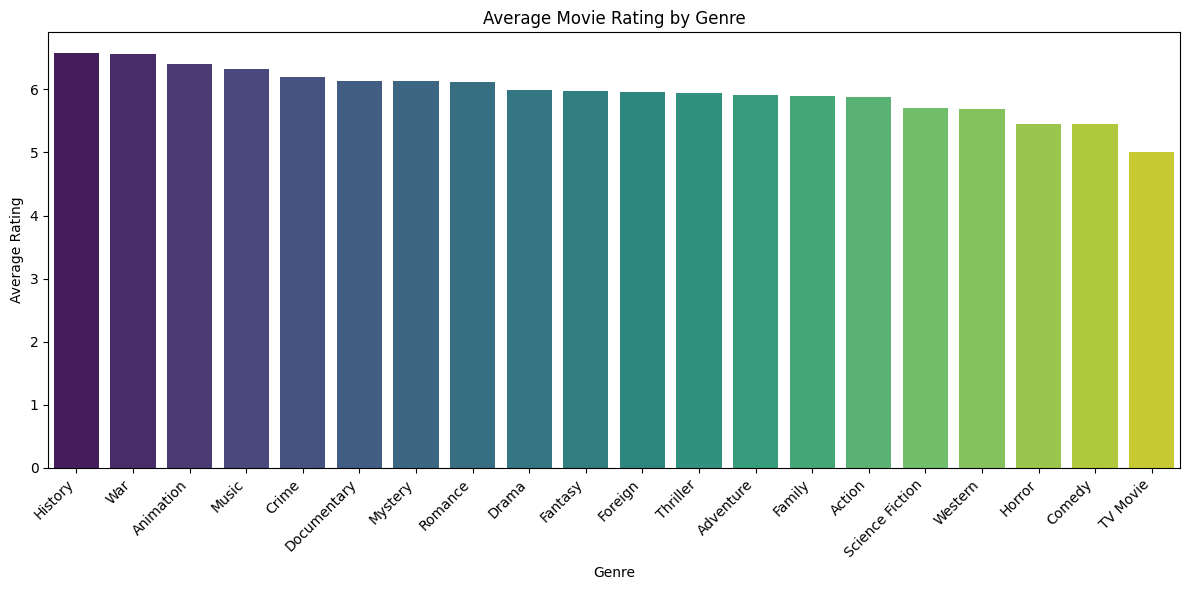

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate average rating by genre
avg_rating_by_genre = df_cleaned.groupby('genre_names')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Movie Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

Genres like History, War, Animation, Music, and Crime have the highest average ratings, typically above 6.3. These genres tend to offer rich narratives, emotional depth, or artistic value, which resonate positively with audiences.

In contrast, genres like TV Movie, Comedy, and Horror have lower average ratings, suggesting they may appeal to more niche or entertainment-focused audiences with potentially lower critical acclaim.

---

#####  Visual 2 — Total Revenue by Genre

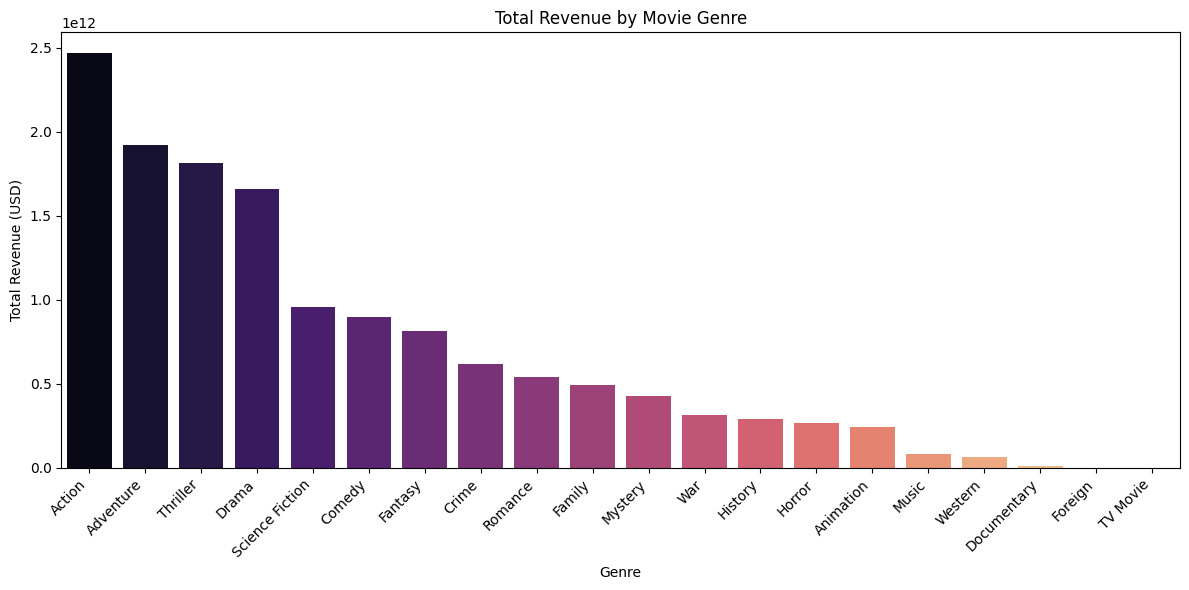

In [121]:
# sum of revenue by genre
revenue_by_genre = df_cleaned.dropna(subset=['revenue']).groupby('genre_names')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by Movie Genre')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

Genres such as Action, Adventure, Thriller, and Drama dominate in terms of total revenue. These genres are typically associated with large scale productions, global appeal, and broad audience targeting, which translates into greater financial success.

Surprisingly, some of the highest rated genres like History and War generate relatively low total revenue, possibly due to limited theatrical runs or lower mass market demand. Genres with moderate ratings like Action or Comedy still lead the box office, showing that financial performance does not always correlate with viewer satisfaction.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If I had more time, I would collect more complete data and clean it more thoroughly, especially around missing values like `endYea`r and `runtimeMinutes`. I’d also explore how production budgets, release years, and country-specific trends influence movie success. It would be interesting to dive deeper into multi-genre films and see how viewer ratings relate to awards. These steps could lead to richer, more accurate insights.